# Recitation 4

## Functions in Julia
In Julia, you can write functions that execute a block of code when called. They can take in a set of variables and output a variable, but they don't have to. Functions are really useful when we want to generalize a formula or algorithm so we can apply it to many different inputs, and so we don't have to copy and paste our code everytime we want to do the same operation. A function is defined using this syntax:

`function function_name(input1, input2, input3, ...)`

inside a function, you can return an output value using the `return` keyword. Once you return an output value, your function will be done executing.

Here's a simple example of a function that takes in a number `n`, squares it and adds one, then returns the new value:

In [ ]:
function squared_plus_one(n)
    new_n = (n^2) + 1
    return new_n
end

squared_plus_one (generic function with 1 method)

Now we can demonstrate this function by calling it on a few different numbers:

In [ ]:
a = 10
a_new = squared_plus_one(a)
@show a_new

b = 57.23
b_new = squared_plus_one(b)
@show b_new

a_new = 101
b_new = 3276.2728999999995


3276.2728999999995

## Matrix Inverses
The inverse of a 2x2 matrix $A=\begin{bmatrix}a & b \\ c & d\end{bmatrix}$ can be found using this simple formula: $$ A^{-1} = \frac{1}{ad-bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}  = \frac{1}{\det(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$$
Let's implement this formula as a Julia function called `inverse_2x2`, so we can test it out on any matrix we want:

In [7]:
using LinearAlgebra

# function to calculate the inverse of a 2x2 matrix A
function inverse_2x2(A)
    # YOUR CODE HERE

    return 0 # replace 0 with your matrix inverse
end

inverse_2x2 (generic function with 1 method)

Now we can try out our function by passing it a few 2x2 matrices. We know that given an nxn matrix $A$, $$A \cdot A^{-1} = I_n$$
So we can test our matrix inverses by multiplying them by our original 2x2 matrices. If our implementation is correct, the following code should print out 2 2x2 identity matrices:

In [8]:
A1 = [1 2; 3 4]
A1_inverse = inverse_2x2(A1)
display(A1 * A1_inverse)

A2 = [5 3; 1 0]
A2_inverse = inverse_2x2(A2)
display(A2 * A2_inverse)

2×2 Matrix{Int64}:
 0  0
 0  0

2×2 Matrix{Int64}:
 0  0
 0  0

## Time analysis: Calculating matrix inverse using LU 

In [12]:
A = randn(5000,5000);
start = time()
inv(A);
elapsed = time()-start

7.040487051010132

In [13]:
F = lu(A)
U = UpperTriangular(F.U);
L = LowerTriangular(F.L);

In [14]:
start = time()
A_inv = inv(U)*inv(L)
elapsed = time()-start

4.455511808395386

## Matrix Determinant using LU Decomposition
Computing the determinant of large square matrices by hand quickly becomes very tedious, but we can use a property of determinants to help us make it easier. We know that 

$$\det(A \cdot B) = \det(A) \cdot \det(B)$$

We also know that a square matrix $A$ can be factorized into two matrices $L$ and $U$ such that $A = L \cdot U$.
We can combine these two properties to give us 

$$ \det(A) = \det(L) \cdot \det(U) $$

Since the determinants of $L$ and $U$ are just the products of their diagonals, and since we can easily compute $L$ and $U$ for an arbitrarily large square matrix, we use this formula to effectively compute the determinant of an arbitrarily large square matrix. 

Lets implement this as a function called `lu_determinant`. we can use Julia's built in `lu` function to factorize $A$.

In [15]:
function lu_determinant(A)
    # YOUR CODE HERE
    
    return 0 # replace 0 with your determinant
end

lu_determinant (generic function with 1 method)

## Time analysis: Is LU really faster?! 

In [16]:
start = time()
det(A);
elapsed = time()-start

1.2524869441986084

In [17]:
start = time()
A_det = det(U)*det(L)
elapsed = time()-start

0.015604972839355469

## Permutation Matrices: Building Intuition 

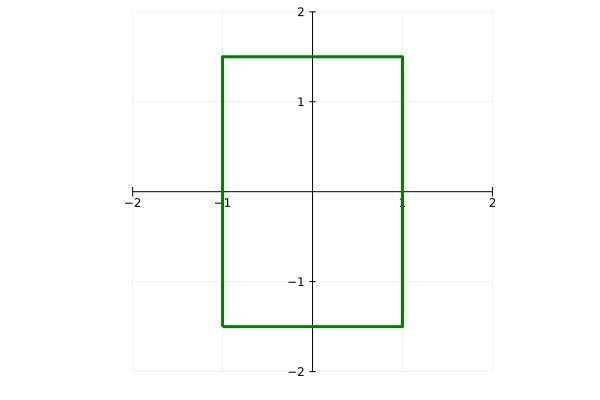

In [19]:
## Let's take a sequence of points that form a rectangle 
using Plots
default(fmt = :png)

points = [-1. -1.5; 1. -1.5;1. 1.5; -1. 1.5; -1. -1.5]';

# x coordinates extracted from the array
x = points[1,:];

# y coordinates extracted from the array
y = points[2,:];

# plotting the array of points in the same plot as a coordinate frame 
plot(x,y, seriescolor = :green, aspect_ratio=:equal, xlims = (-2,2), ylims = (-2,2), 
    grid = true, framestyle = :origin, legend = false, linewidth=3)

In [22]:
b = [x[1], y[1], x[2], y[2], x[3], y[3], x[4], y[4], x[5], y[5]]

10-element Vector{Float64}:
 -1.0
 -1.5
  1.0
 -1.5
  1.0
  1.5
 -1.0
  1.5
 -1.0
 -1.5

### Build a P to get a hour glass like shape 

In [23]:
ideal_b = [x[1], y[1], x[3], y[3], x[4], y[4], x[2], y[2], x[5], y[5]]

10-element Vector{Float64}:
 -1.0
 -1.5
  1.0
  1.5
 -1.0
  1.5
  1.0
 -1.5
 -1.0
 -1.5

In [28]:
points = reshape(ideal_b, (2,5))

2×5 Matrix{Float64}:
 -1.0  1.0  -1.0   1.0  -1.0
 -1.5  1.5   1.5  -1.5  -1.5

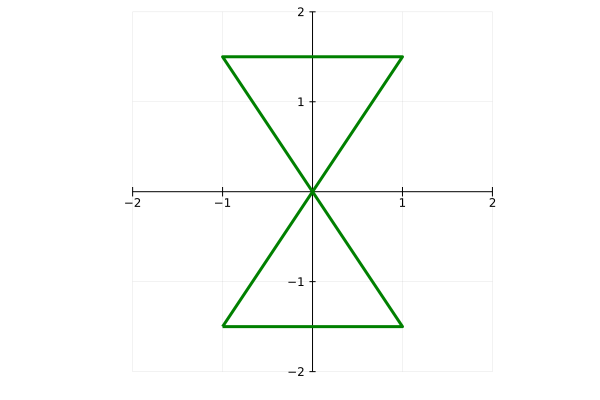

In [29]:
# x coordinates extracted from the array
x = points[1,:];

# y coordinates extracted from the array
y = points[2,:];

# plotting the array of points in the same plot as a coordinate frame 
plot(x,y, seriescolor = :green, aspect_ratio=:equal, xlims = (-2,2), ylims = (-2,2), 
    grid = true, framestyle = :origin, legend = false, linewidth=3)